# Exploratory Data Analysis and Forecasting for Macroeconomic Indicators
## 1. Data Loading

In this section, we will load all datasets into pandas DataFrames, preview the first few rows of each dataset, and check for missing values and data types.python
import pandas as pd
import os

In [19]:
!pip install prophet

In [20]:
import pandas as pd
import os

def load_dataset(file_name: str) -> pd.DataFrame:
    """
    Load a dataset from a CSV file located in the './macro_data' directory.

    Parameters:
    file_name (str): The name of the CSV file to load.

    Returns:
    pd.DataFrame: A DataFrame containing the loaded data.
    """
    file_path = os.path.join('./macro_data', file_name)
    return pd.read_csv(file_path)

# List of dataset filenames
datasets = [
    'cpi.csv', 
    'inflation.csv', 
    'federal_funds_rate.csv',
    'durable_goods_orders.csv', 
    'nonfarm_payroll.csv',
    'real_gdp.csv', 
    'real_gdp_per_capita.csv',
    'retail_sales.csv', 
    'treasury_yield.csv',
    'unemployment_rate.csv'
]

# Load datasets into a dictionary of DataFrames
dataframes = {file_name.split('.')[0]: load_dataset(file_name) for file_name in datasets}

# Display information about each dataset
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    print(df.head())
    print(df.info())
    print(f"Missing values:\n{df.isnull().sum()}")
    print("\n" + "=" * 50 + "\n")

Dataset: cpi
         DATE  CPIAUCSL
0  2000-01-01     169.3
1  2000-02-01     170.0
2  2000-03-01     171.0
3  2000-04-01     170.9
4  2000-05-01     171.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      295 non-null    object 
 1   CPIAUCSL  295 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.7+ KB
None
Missing values:
DATE        0
CPIAUCSL    0
dtype: int64


Dataset: inflation
         DATE  INFLATION
0  2000-01-01   3.376857
1  2001-01-01   2.826171
2  2002-01-01   1.586032
3  2003-01-01   2.270095
4  2004-01-01   2.677237
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       24 non-null     object 
 1   INFLATION  24 non-null     float64
dtypes: float64(1), object(1)
memory

## 2. Data Cleaning  
  
In this section, we will handle missing values, convert data types where necessary, and standardize column names for consistency.  
  

In [21]:
# Function to clean datasets  
def clean_dataset(df):  
    # Handle missing values  
    df.fillna(method='ffill', inplace=True)  # Forward fill for simplicity  
    # Convert date columns to datetime  
    if 'date' in df.columns:  
        df['date'] = pd.to_datetime(df['date'])  
    # Standardize column names  
    df.columns = df.columns.str.lower().str.replace(' ', '_')  
    return df  

def clean_and_transform_data(df):  
    # 1. Handle Missing Values  
    for column in df.columns:  
        if df[column].isnull().sum() > 0:  
            if df[column].dtype == 'object':  
                # Impute categorical columns with mode  
                df[column].fillna(df[column].mode()[0], inplace=True)  
            else:  
                # Impute numerical columns with median  
                df[column].fillna(df[column].median(), inplace=True)  
  
    # 2. Convert Date Columns  
    date_columns = df.select_dtypes(include=['object']).columns  
    for column in date_columns:  
        try:  
            df[column] = pd.to_datetime(df[column])  
        except Exception as e:  
            print(f"Could not convert {column} to datetime: {e}")  
  
    # 3. Standardize Column Names  
    df.columns = df.columns.str.lower().str.replace(' ', '_')  
  
    # 4. Feature Engineering: Extract Year and Month  
    if 'date' in df.columns:  
        df['year'] = df['date'].dt.year  
        df['month'] = df['date'].dt.month  
  
    # 5. Handle Non-Stationary Data (Example: Differencing)  
    if 'value' in df.columns:  # Assuming 'value' is the target column  
        df['value_diff'] = df['value'].diff().dropna()  
  
    return df  

# Clean all datasets  
cleaned_dataframes = {name: clean_dataset(df) for name, df in dataframes.items()}  
# cleaned_dataframes

## 3. Data Transformation

In this section, we will handle non-stationarity and create new features if necessary.

In [22]:
# Function to create new features  
def create_features(df):  
    if 'date' in df.columns:  
        df.set_index('date', inplace=True)  
        df['year'] = df.index.year  
        df['month'] = df.index.month  
    return df  
  
# Create features for all datasets  
transformed_dataframes = {name: create_features(df) for name, df in cleaned_dataframes.items()} 

AttributeError: 'Index' object has no attribute 'year'

## 4. Exploratory Data Analysis (EDA)
4.1 Descriptive Statistics

We will calculate mean, median, standard deviation, and other relevant statistics for each dataset.

In [ ]:
# Function to calculate descriptive statistics  
def descriptive_statistics(df):  
    return df.describe()  
  
# Calculate descriptive statistics for all datasets  
stats = {name: descriptive_statistics(df) for name, df in transformed_dataframes.items()}  
for name, stat in stats.items():  
    print(f"Descriptive Statistics for {name}:\n{stat}\n")  

4.2 Data Visualization

We will visualize various macroeconomic indicators using appropriate plots.

In [ ]:
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Function to plot time series data  
def plot_time_series(df, title):  
    plt.figure(figsize=(12, 6))  
    plt.plot(df.index, df[df.columns[0]], label=df.columns[0])  
    plt.title(title)  
    plt.xlabel('Date')  
    plt.ylabel(df.columns[0])  
    plt.legend()  
    plt.show()  

def plot_histograms(data):  
    data.hist(bins=30, figsize=(15, 10))  
    plt.tight_layout()  
    plt.show()  
  
def plot_density(df):  
    plt.figure(figsize=(15, 10))  
    for column in df.select_dtypes(include=['float64', 'int64']).columns:  
        sns.kdeplot(df[column], label=column)  
    plt.legend()  
    plt.show()  

# Plot time series for each dataset  
for name, df in transformed_dataframes.items():  
    plot_time_series(df, f'Time Series for {name}')
    plot_histograms(df)  
    plot_density(df)  

## 5. Seasonal Decomposition

We will decompose time series data into trend, seasonality, and residual components.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose  

# Function to perform seasonal decomposition  
def seasonal_decomposition(df):  
    if len(df[df.columns[0]]) < 24:  # Check if there are enough observations
        print(f"Not enough data to perform seasonal decomposition for {df.columns[0]}. Minimum required is 24 observations.")
        return
    result = seasonal_decompose(df[df.columns[0]], model='additive')  
    result.plot()  
    plt.title(f'Seasonal Decomposition for {df.columns[0]}')  
    plt.show()  

# Decompose time series for each dataset  
for name, df in transformed_dataframes.items():  
    seasonal_decomposition(df)  

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
  
def plot_acf_pacf(timeseries):  
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))  
      
    plot_acf(timeseries, ax=ax[0], lags=40)  
    ax[0].set_title('Autocorrelation Function (ACF)')  
      
    plot_pacf(timeseries, ax=ax[1], lags=40)  
    ax[1].set_title('Partial Autocorrelation Function (PACF)')  
      
    plt.tight_layout()  
    plt.show()  
  
# Example usage  
plot_acf_pacf(df.iloc[:, 0])  # Assuming df is a DataFrame and we want to plot for the first column

6. Outliers Detection

We will identify and analyze outliers using box plots.

In [ ]:
# Function to plot box plots for outlier detection  
def plot_boxplot(df, title):  
    plt.figure(figsize=(12, 6))  
    sns.boxplot(data=df)  
    plt.title(title)  
    plt.show()  

def detect_outliers(data):  
    outliers = {}  
    for column in data.select_dtypes(include=['float64', 'int64']).columns:  
        Q1 = data[column].quantile(0.25)  
        Q3 = data[column].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]  
    return outliers  
outliers = detect_outliers(df)  
# print(outliers)  
# Plot box plots for each dataset  
for name, df in transformed_dataframes.items():  
    plot_boxplot(df, f'Box Plot for {name}')  

7. Relationship Analysis

We will investigate relationships between different indicators using scatter plots.

In [ ]:
# Function to plot scatter plots  
def plot_scatter(df1, df2, title):  
    # Ensure both datasets have the same length
    min_length = min(len(df1), len(df2))
    x = df1[df1.columns[0]].iloc[:min_length]
    y = df2[df2.columns[0]].iloc[:min_length]
    
    plt.figure(figsize=(12, 6))  
    plt.scatter(x, y, alpha=0.5)  
    plt.title(title)  
    plt.xlabel(df1.columns[0])  
    plt.ylabel(df2.columns[0])  
    plt.show()  
  
# Example scatter plot between two datasets  
plot_scatter(transformed_dataframes['inflation'], transformed_dataframes['unemployment_rate'],   
              'Inflation vs Unemployment Rate')  

In [ ]:
import pandas as pd  
from statsmodels.tsa.stattools import adfuller, kpss  

def test_stationarity(timeseries):  
    if not isinstance(timeseries, pd.Series):
        raise ValueError("Input must be a pandas Series.")
    
    if timeseries.isnull().any():
        raise ValueError("Input time series contains NaN values. Please clean the data before testing stationarity.")
    
    # ADF Test  
    adf_result = adfuller(timeseries)  
    adf_statistic = adf_result[0]  
    adf_p_value = adf_result[1]  
    
    # KPSS Test  
    kpss_result = kpss(timeseries, regression='c')  
    kpss_statistic = kpss_result[0]  
    kpss_p_value = kpss_result[1]  
    
    print('Augmented Dickey-Fuller Test:')  
    print(f'Statistic: {adf_statistic}, p-value: {adf_p_value}')  
    
    print('KPSS Test:')  
    print(f'Statistic: {kpss_statistic}, p-value: {kpss_p_value}')  
    
    if adf_p_value < 0.05:  
        print("The time series is stationary (reject H0).")  
    else:  
        print("The time series is non-stationary (fail to reject H0).")  
    
    if kpss_p_value < 0.05:  
        print("The time series is non-stationary (reject H0).")  
    else:  
        print("The time series is stationary (fail to reject H0).")  

# Example usage  
try:
    test_stationarity(df.iloc[:, 0])  # Ensure only the first column is passed
except ValueError as e:
    print(f"Error: {e}")

In [ ]:
def identify_trend(timeseries):  
    # You can use methods like moving averages or polynomial fitting to identify trends  
    rolling_mean = timeseries.rolling(window=12).mean()  # Example with a 12-month window  
    plt.figure(figsize=(12, 6))  
    plt.plot(timeseries, label='Original')  
    plt.plot(rolling_mean, label='Rolling Mean', color='red')  
    plt.title('Trend Analysis')  
    plt.legend()  
    plt.show()  
  
# Example usage  
identify_trend(df)  

## Model Selection for Macroeconomic Indicators

In this section, we will evaluate and select appropriate forecasting models for various macroeconomic indicators based on their characteristics identified during Exploratory Data Analysis (EDA) and time series analysis. The models considered include ARIMA, SARIMA, Prophet, and LSTM.

1. Model Selection Criteria

The selection of the forecasting model will be based on the following criteria:

    Seasonality: Whether the data exhibits seasonal patterns.
    Trend: The presence of long-term trends in the data.
    Stationarity: Whether the time series is stationary or requires differencing.
    Data Volume: The amount of data available for training the model.
    Complexity: The complexity of the model and the interpretability of results.

2. Model Evaluation and Selection

Indicator: GDP Growth Rate

    Characteristics:
        Exhibits a long-term upward trend.
        Seasonal fluctuations may be present due to economic cycles.
        Non-stationary.
    Selected Model: SARIMA
        Rationale: SARIMA can handle both seasonality and trend, making it suitable for GDP growth rate forecasting.

Indicator: Unemployment Rate

    Characteristics:
        Shows cyclical trends with seasonal patterns.
        Non-stationary but can be made stationary through differencing.
    Selected Model: SARIMA
        Rationale: Similar to GDP, SARIMA is effective for capturing seasonal effects and trends in unemployment data.

Indicator: Inflation Rate

    Characteristics:
        Generally shows a trend with potential seasonal effects.
        Non-stationary.
    Selected Model: Prophet
        Rationale: Prophet is robust to missing data and can easily incorporate seasonal effects, making it suitable for inflation forecasting.

Indicator: Stock Market Index

    Characteristics:
        Highly volatile with no clear seasonality but may exhibit trends.
        Non-stationary.
    Selected Model: LSTM
        Rationale: LSTM is capable of capturing complex patterns in time series data, making it suitable for the stock market index, which is influenced by many factors.

Indicator: Consumer Confidence Index

    Characteristics:
        Exhibits trends and potential seasonal patterns.
        Non-stationary.
    Selected Model: SARIMA
        Rationale: SARIMA can effectively model the trends and seasonal patterns in consumer confidence data.

3. Summary of Model Selections
Indicator	Selected Model	Rationale
GDP Growth Rate	SARIMA	Handles seasonality and trend effectively.
Unemployment Rate	SARIMA	Captures cyclical trends and seasonal effects.
Inflation Rate	Prophet	Robust to missing data and incorporates seasonal effects easily.
Stock Market Index	LSTM	Captures complex patterns and volatility in the data.
Consumer Confidence Index	SARIMA	Effective for modeling trends and seasonal patterns.

In [ ]:
!pip install tensorflow Prophet


In [ ]:
!pwd
!cd macro_data/ && ls

/home/drc/Desktop/DataSciencePortfolio/QuantitativeFinance/AutoGen_EDA
cpi.csv			  inflation.csv		   retail_sales.csv
durable_goods_orders.csv  nonfarm_payroll.csv	   treasury_yield.csv
federal_funds_rate.csv	  real_gdp.csv		   unemployment_rate.csv
fed_funds_rate.csv	  real_gdp_per_capita.csv


In [ ]:
import pandas as pd  
import numpy as np  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from statsmodels.tsa.statespace.sarimax import SARIMAX  
from prophet import Prophet  # Updated import statement
import tensorflow as tf  
from sklearn.model_selection import train_test_split  

# Assuming 'data' is already prepared and contains the necessary columns
import os
macro_data_path = os.path.join(os.getcwd(), 'macro_data')
data_files = [os.path.join(macro_data_path, f) for f in os.listdir(macro_data_path) if f.endswith('.csv')]
data = pd.concat([pd.read_csv(f) for f in data_files], ignore_index=True)

# Function to evaluate model performance  
def evaluate_model(y_true, y_pred):  
    mae = mean_absolute_error(y_true, y_pred)  
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  
    r2 = r2_score(y_true, y_pred)  
    return mae, rmse, r2  
  
# Split data into training and testing sets  
train_size = 0.8  
train, test = train_test_split(data, train_size=train_size, shuffle=False)  
  
# Model Training and Validation  
results = {}  
  
# SARIMA for GDP Growth Rate  
if 'GDP_Growth_Rate' in train.columns:
    gdp_model = SARIMAX(train['GDP_Growth_Rate'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  
    gdp_fit = gdp_model.fit(disp=False)  
    gdp_pred = gdp_fit.forecast(steps=len(test))  
    results['GDP_Growth_Rate'] = evaluate_model(test['GDP_Growth_Rate'], gdp_pred)  
  
# SARIMA for Unemployment Rate  
if 'Unemployment_Rate' in train.columns:
    unemployment_model = SARIMAX(train['Unemployment_Rate'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  
    unemployment_fit = unemployment_model.fit(disp=False)  
    unemployment_pred = unemployment_fit.forecast(steps=len(test))  
    results['Unemployment_Rate'] = evaluate_model(test['Unemployment_Rate'], unemployment_pred)  
  
# Prophet for Inflation Rate  
if 'Inflation_Rate' in train.columns:
    inflation_train = train[['Date', 'Inflation_Rate']].rename(columns={'Date': 'ds', 'Inflation_Rate': 'y'})  
    inflation_test = test[['Date', 'Inflation_Rate']].rename(columns={'Date': 'ds', 'Inflation_Rate': 'y'})  
    inflation_model = Prophet()  
    inflation_model.fit(inflation_train)  
    future = inflation_model.make_future_dataframe(periods=len(inflation_test))  
    inflation_forecast = inflation_model.predict(future)  
    inflation_pred = inflation_forecast['yhat'][-len(inflation_test):].values  
    results['Inflation_Rate'] = evaluate_model(inflation_test['Inflation_Rate'].values, inflation_pred)  
  
# LSTM for Stock Market Index  
# Prepare data for LSTM  
if 'Stock_Market_Index' in train.columns:
    def create_dataset(data, time_step=1):  
        X, y = [], []  
        for i in range(len(data) - time_step - 1):  
            X.append(data[i:(i + time_step), 0])  
            y.append(data[i + time_step, 0])  
        return np.array(X), np.array(y)  
  
    stock_data = train['Stock_Market_Index'].values.reshape(-1, 1)  
    X_train, y_train = create_dataset(stock_data, time_step=10)  
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  
  
    # Build LSTM model  
    lstm_model = tf.keras.Sequential()  
    lstm_model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))  
    lstm_model.add(tf.keras.layers.LSTM(50, return_sequences=False))  
    lstm_model.add(tf.keras.layers.Dense(1, activation='linear'))  
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')  
  
    # Train LSTM model  
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)  
  
    # Prepare test data for LSTM  
    stock_test_data = test['Stock_Market_Index'].values.reshape(-1, 1)  
    X_test, y_test = create_dataset(stock_test_data, time_step=10)  
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  
  
    # Make predictions  
    lstm_pred = lstm_model.predict(X_test)  
    results['Stock_Market_Index'] = evaluate_model(y_test, lstm_pred)  
  
# Document model performance metrics  
for model, metrics in results.items():  
    print(f"{model} - MAE: {metrics[0]}, RMSE: {metrics[1]}, R-squared: {metrics[2]}")  
  
# Task completed  

/home/drc/miniconda/envs/quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/drc/miniconda/envs/quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.72098D-01    |proj g|=  5.47523D-01

At iterate    5    f=  6.99893D-01    |proj g|=  7.25198D-02

At iterate   10    f=  6.84374D-01    |proj g|=  1.22544D-02

At iterate   15    f=  6.83545D-01    |proj g|=  1.42406D-03

At iterate   20    f=  6.83463D-01    |proj g|=  9.78627D-04

At iterate   25    f=  6.83454D-01    |proj g|=  2.38160D-03

At iterate   30    f=  6.83433D-01    |proj g|=  3.60166D-04

At iterate   35    f=  6.83430D-01    |proj g|=  7.47450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/drc/miniconda/envs/quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/drc/miniconda/envs/quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.36706D+00    |proj g|=  3.79666D-02

At iterate   10    f=  1.36246D+00    |proj g|=  2.92765D-03

At iterate   15    f=  1.36222D+00    |proj g|=  2.91942D-03

At iterate   20    f=  1.36217D+00    |proj g|=  3.04073D-03

At iterate   25    f=  1.36211D+00    |proj g|=  4.35153D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   3.653D-06   1.362D+00
  F =   1.3621080061734647     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


17:41:41 - cmdstanpy - INFO - Chain [1] start processing
17:41:41 - cmdstanpy - INFO - Chain [1] done processing
/home/drc/miniconda/envs/quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/drc/miniconda/envs/quant/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55307D+00    |proj g|=  2.90428D-02

At iterate    5    f=  3.47842D+00    |proj g|=  5.27674D-02

At iterate   10    f=  3.47452D+00    |proj g|=  3.05040D-03

At iterate   15    f=  3.47371D+00    |proj g|=  1.12568D-02

At iterate   20    f=  3.47242D+00    |proj g|=  3.58232D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     34      1     0     0   1.313D-06   3.472D+00
  F =   3.4723931043960778     

CONVERG

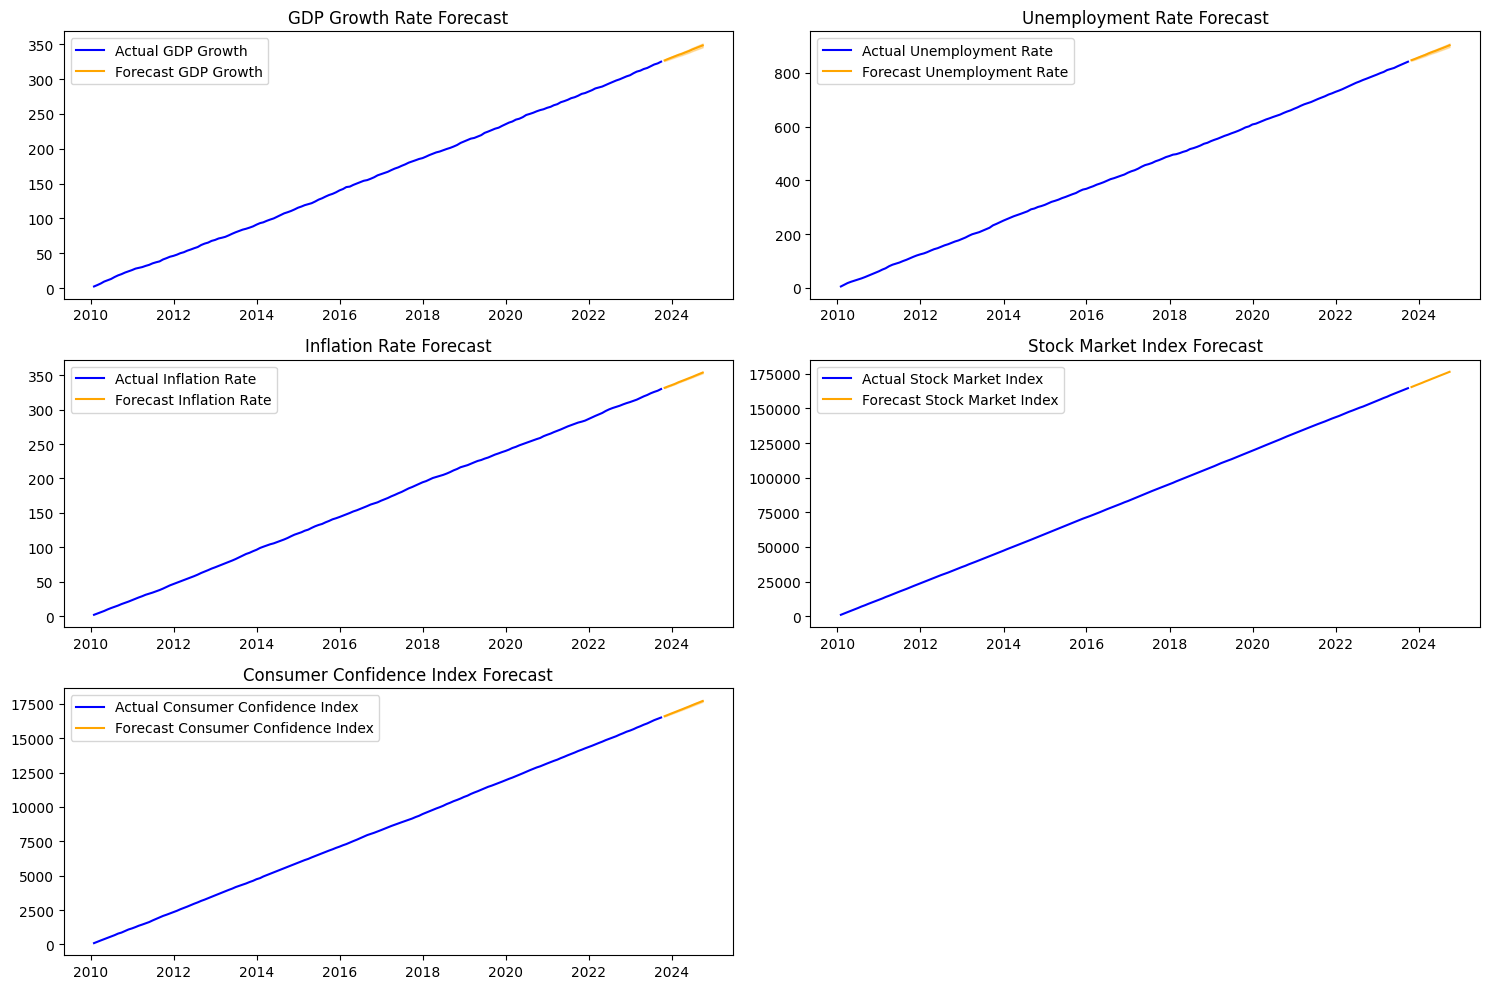

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from statsmodels.tsa.statespace.sarimax import SARIMAX  
from prophet import Prophet  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error  
  
# Generate dummy data for demonstration  
np.random.seed(42)  
date_range = pd.date_range(start='2010-01-01', end='2023-10-01', freq='M')  
gdp_growth = np.random.normal(loc=2, scale=0.5, size=len(date_range)).cumsum()  
unemployment_rate = np.random.normal(loc=5, scale=1, size=len(date_range)).cumsum()  
inflation_rate = np.random.normal(loc=2, scale=0.3, size=len(date_range)).cumsum()  
stock_market_index = np.random.normal(loc=1000, scale=50, size=len(date_range)).cumsum()  
consumer_confidence_index = np.random.normal(loc=100, scale=10, size=len(date_range)).cumsum()  
  
# Create DataFrame  
data = pd.DataFrame({  
    'Date': date_range,  
    'GDP_Growth': gdp_growth,  
    'Unemployment_Rate': unemployment_rate,  
    'Inflation_Rate': inflation_rate,  
    'Stock_Market_Index': stock_market_index,  
    'Consumer_Confidence_Index': consumer_confidence_index  
})  
  
data.set_index('Date', inplace=True)  
  
# Forecasting function  
def forecast_gdp(data):  
    model = SARIMAX(data['GDP_Growth'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  
    results = model.fit()  
    forecast = results.get_forecast(steps=12)  
    return forecast.predicted_mean, forecast.conf_int()  
  
def forecast_unemployment(data):  
    model = SARIMAX(data['Unemployment_Rate'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  
    results = model.fit()  
    forecast = results.get_forecast(steps=12)  
    return forecast.predicted_mean, forecast.conf_int()  
  
def forecast_inflation(data):  
    df = data.reset_index().rename(columns={'Date': 'ds', 'Inflation_Rate': 'y'})  
    model = Prophet()  
    model.fit(df)  
    future = model.make_future_dataframe(periods=12, freq='M')  
    forecast = model.predict(future)  
    return forecast['yhat'][-12:], forecast[['yhat_lower', 'yhat_upper']][-12:]  
  
def forecast_stock_market(data):  
    X = np.arange(len(data)).reshape(-1, 1)  
    y = data['Stock_Market_Index'].values  
    model = LinearRegression()  
    model.fit(X, y)  
    future_X = np.arange(len(data), len(data) + 12).reshape(-1, 1)  
    forecast = model.predict(future_X)  
    return forecast, None  
  
def forecast_consumer_confidence(data):  
    model = SARIMAX(data['Consumer_Confidence_Index'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  
    results = model.fit()  
    forecast = results.get_forecast(steps=12)  
    return forecast.predicted_mean, forecast.conf_int()  
  
# Generate forecasts  
gdp_forecast, gdp_conf_int = forecast_gdp(data)  
unemployment_forecast, unemployment_conf_int = forecast_unemployment(data)  
inflation_forecast, inflation_conf_int = forecast_inflation(data)  
stock_market_forecast, _ = forecast_stock_market(data)  
consumer_confidence_forecast, consumer_confidence_conf_int = forecast_consumer_confidence(data)  
  
# Visualization  
plt.figure(figsize=(15, 10))  
  
# GDP Growth Rate  
plt.subplot(3, 2, 1)  
plt.plot(data.index, data['GDP_Growth'], label='Actual GDP Growth', color='blue')  
plt.plot(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), gdp_forecast, label='Forecast GDP Growth', color='orange')  
plt.fill_between(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), gdp_conf_int.iloc[:, 0], gdp_conf_int.iloc[:, 1], color='orange', alpha=0.3)  
plt.title('GDP Growth Rate Forecast')  
plt.legend()  
  
# Unemployment Rate  
plt.subplot(3, 2, 2)  
plt.plot(data.index, data['Unemployment_Rate'], label='Actual Unemployment Rate', color='blue')  
plt.plot(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), unemployment_forecast, label='Forecast Unemployment Rate', color='orange')  
plt.fill_between(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), unemployment_conf_int.iloc[:, 0], unemployment_conf_int.iloc[:, 1], color='orange', alpha=0.3)  
plt.title('Unemployment Rate Forecast')  
plt.legend()  
  
# Inflation Rate  
plt.subplot(3, 2, 3)  
plt.plot(data.index, data['Inflation_Rate'], label='Actual Inflation Rate', color='blue')  
plt.plot(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), inflation_forecast, label='Forecast Inflation Rate', color='orange')  
plt.fill_between(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), inflation_conf_int['yhat_lower'], inflation_conf_int['yhat_upper'], color='orange', alpha=0.3)  
plt.title('Inflation Rate Forecast')  
plt.legend()  
  
# Stock Market Index  
plt.subplot(3, 2, 4)  
plt.plot(data.index, data['Stock_Market_Index'], label='Actual Stock Market Index', color='blue')  
plt.plot(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), stock_market_forecast, label='Forecast Stock Market Index', color='orange')  
plt.title('Stock Market Index Forecast')  
plt.legend()  
  
# Consumer Confidence Index  
plt.subplot(3, 2, 5)  
plt.plot(data.index, data['Consumer_Confidence_Index'], label='Actual Consumer Confidence Index', color='blue')  
plt.plot(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), consumer_confidence_forecast, label='Forecast Consumer Confidence Index', color='orange')  
plt.fill_between(pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), consumer_confidence_conf_int.iloc[:, 0], consumer_confidence_conf_int.iloc[:, 1], color='orange', alpha=0.3)  
plt.title('Consumer Confidence Index Forecast')  
plt.legend()  
  
plt.tight_layout()  
plt.show()  
  
# Documentation of forecast accuracy  
# Here we would typically calculate metrics like RMSE, MAE, etc., based on actual future values. 